# Dictionary

In [ ]:
# Get keys
k = list(results.keys())

# Get values
v = list(results.values())

# Save a csv file

In [ ]:
output = pd.DataFrame({'Id': test_data.PassengerId, 'Prediction': predictions})
output.to_csv('my_submission.csv', index=False)
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Missing Values

In [ ]:
# Count Missing values
missing_val_count_by_column = (X_train.isnull().sum())

In [ ]:
# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(col_names, axis=1)
reduced_X_valid = X_valid.drop(col_names, axis=1)

In [ ]:
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

In [ ]:
# Get columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Formatting

In [16]:
print("Use commas and round to 2 decimal places: {:,.1f}".format(123456.789))

Use commas and round to 2 decimal places: 123,456.8


# Word Search

A researcher has gathered thousands of news articles. But she wants to focus her attention on articles including a specific word. Complete the function below to help her filter her list of articles.

Your function should meet the following criteria:

    Do not include documents where the keyword string shows up only as a part of a larger word. For example, if she were looking for the keyword “closed”, you would not include the string “enclosed.”
    She does not want you to distinguish upper case from lower case letters. So the phrase “Closed the case.” would be included when the keyword is “closed”
    Do not let periods or commas affect what is matched. “It is closed.” would be included when the keyword is “closed”. But you can assume there are no other types of punctuation.


In [8]:
def word_search(doc_list, keyword):
    """
    Takes a list of documents (each document is a string) and a keyword. 
    Returns list of the index values into the original list for all documents 
    containing the keyword.

    Example:
    doc_list = ["The Learn Python Challenge Casino.", "They bought a car", "Casinoville"]
    >>> word_search(doc_list, 'casino')
    >>> [0]
    """
    
    indexList = []
    
    for i, doc in enumerate(doc_list):
        words = doc.split()
        strippedWords = [w.rstrip('.,').lower() for w in words]
        
        if(keyword in strippedWords):
            indexList.append(i)
            
    return indexList

doc_list = ["The Learn Python Challenge Casino.", "They bought a car", "Casinoville"]
indexList = word_search(doc_list, 'car')

indexList

car


[1]

# Basic Model Setup

In [18]:
# Data Loading Code Hidden Here
import pandas as pd

# Load data
file_path = r'C:\Users\Gabor\OneDrive\Documents\Code\Notebooks\data\salaries.csv'
_data = pd.read_csv(file_path) 
# Filter rows with missing price values
filtered_data = _data.dropna(axis=0)

# Choose target and features
y = filtered_data.age
features = ['earn', 'height', 'ed', 'sex', 'race']
X = pd.get_dummies(filtered_data[features])
X.head()
from sklearn.tree import DecisionTreeRegressor
# Define model
model = DecisionTreeRegressor()
# Fit model
model.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# calculate the mean absolute error
from sklearn.metrics import mean_absolute_error

predicted_home_prices = melbourne_model.predict(X)
mae = mean_absolute_error(y, predicted_home_prices)

In [ ]:
# Split train and validation data 
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

In [ ]:
# More Train/Test/Split
features,labels=class12.iloc[:,0:-1],class12.loc[:,['label']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=.2, random_state=42)

# Imputer

In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

# Standardization

Scales the data. Centers and divides by standard deviation.

In [ ]:
# Built in scaler/standardizer
df2=df[['Income','Limit','Rating']].copy()
df2.sort_values(by='Income')
scaler = StandardScaler()
print(scaler.fit(df2))
#print(scaler.mean_)
print(scaler.transform(df2))
result = scaler.inverse_transform(df2)

dataframe=pd.DataFrame(result, columns=['a']) 
dataframe.sort_values(by='a')

# Categorical Variables

#### Get list of categorical variables

In [ ]:

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

#### Get a list of unique string columns and numeric columns

In [ ]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

#### Approach 1
We drop the object columns with the select_dtypes() method.

In [ ]:

drop_X_train = X_train.select_dtypes(exclude=['object'])

####  Dealing with labels in val but not in train

In [ ]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
#print('Categorical columns that will be label encoded:', good_label_cols)
#print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

#### Approach 2
Scikit-learn has a LabelEncoder class that can be used to get label encodings. 
We loop over the categorical variables and apply the label encoder separately to each column.

In [ ]:

from sklearn.preprocessing import LabelEncoder

# Make copy to avoid changing original data 
label_X_train = X_train.copy()
label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in object_cols:
    label_X_train[col] = label_encoder.fit_transform(X_train[col])
    label_X_valid[col] = label_encoder.transform(X_valid[col])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))


# Another example:
cat_features = ['category', 'currency', 'country']
encoder = LabelEncoder()
# Apply the label encoder to each column
encoded = df[cat_features].apply(encoder.fit_transform)

#### Find the number of unique entries of a categorical variable aka the cardinality of that categorical variable

In [ ]:
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

#### Find columns to One-Hot Encode

In [ ]:
# Columns that will be one-hot encoded
# Less than 10 unique values
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

print('Categorical columns that will be one-hot encoded:', low_cardinality_cols)
print('\nCategorical columns that will be dropped from the dataset:', high_cardinality_cols)

#### Approach 3
One-Hot Encoding
We set handle_unknown='ignore' to avoid errors when the validation data contains classes that aren't epresented in the training data, and
setting sparse=False ensures that the encoded columns are returned as a numpy array (instead of a sparse matrix).


In [ ]:

from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))


#### Approach 4
Convert categorical to binary in place

In [ ]:
# Conver 3 of the columns to categorical columns

credit_card_data['Gender'] = credit_card_data['Gender'].astype('category')
credit_card_data['Student'] = credit_card_data['Student'].astype('category')
credit_card_data['Married'] = credit_card_data['Married'].astype('category')

# Get a list of these categorical columns
categorical_columns = credit_card_data.select_dtypes(['category']).columns

# Apply categorical codes to these 3 columns
credit_card_data[categorical_columns] = credit_card_data[categorical_columns].apply(lambda x: x.cat.codes)

# Pipelines

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Similar to how a pipeline bundles together preprocessing and modeling steps, we use the ColumnTransformer 
# class to bundle together different preprocessing steps
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [ ]:
from sklearn.metrics import mean_absolute_error

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

# Plotting

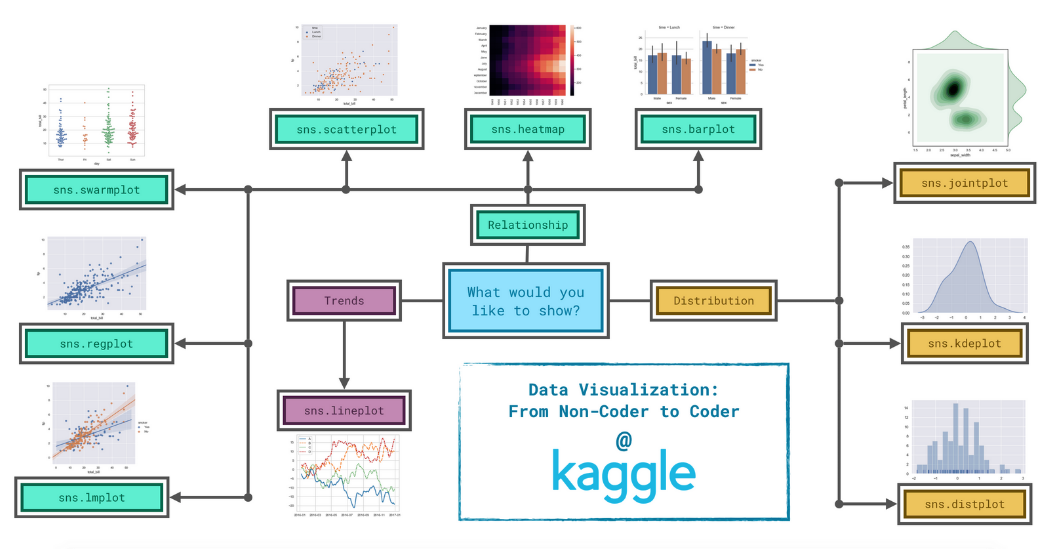

#### Scatter Plot

In [ ]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Create a scatter plot from one dataframe using columns 1 in x-axis and column 2 in y-axis. 
# If column 3 in the dataset is a 0, mark it as red, if 1, then blue
colors=["red","blue"]
plt.scatter(class12.iloc[:,0],class12.iloc[:,1],color=[colors[idx] for idx in class12.iloc[:,2]],marker="o")
plt.xlabel("X1")
plt.ylabel("X2")

In [ ]:
insurance_filepath = "../input/insurance.csv"
insurance_data = pd.read_csv(insurance_filepath)

In [2]:
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'])

In [ ]:
# With regression line
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

In [ ]:
# With color code
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'])

In [ ]:
# With color code and 2 regression lines
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

In [ ]:
# categorical scatter plot
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['charges'])

In [ ]:
# Histogram 
sns.distplot(a=iris_data['Petal Length (cm)'], kde=False)

In [ ]:
# KDE plot (smoothed histogram)
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

In [ ]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde")

In [ ]:
# 3 Histogams in one plot
# Histograms for each species
sns.distplot(a=iris_set_data['Petal Length (cm)'], label="Iris-setosa", kde=False)
sns.distplot(a=iris_ver_data['Petal Length (cm)'], label="Iris-versicolor", kde=False)
sns.distplot(a=iris_vir_data['Petal Length (cm)'], label="Iris-virginica", kde=False)

# Add title
plt.title("Histogram of Petal Lengths, by Species")

# Force legend to appear
plt.legend()

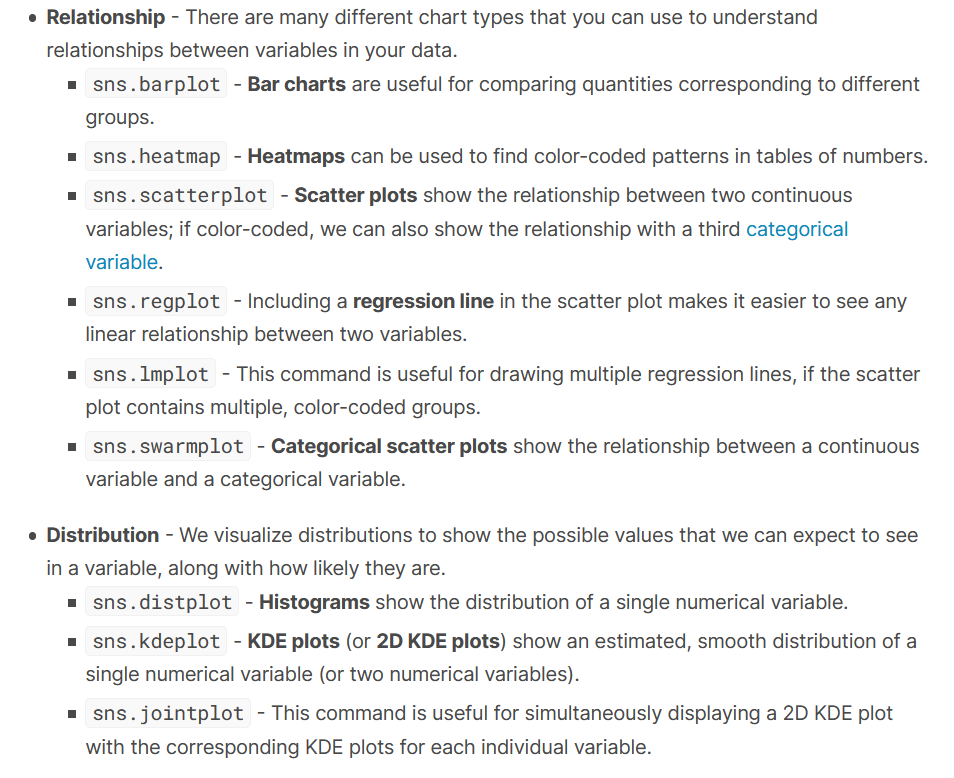

# Pandas

#### DataFrame and Series

In [ ]:
# Create dataframe with index
pd.DataFrame({'Bob': ['I liked it.', 'It was awful.'], 'Sue': ['Pretty good.', 'Bland.']}, 
             index=['Product A', 'Product B'])

In [ ]:
# Create Series (a single column of a DataFrame)
pd.Series([1, 2, 3, 4, 5])

pd.Series([30, 35, 40], index=['2015 Sales', '2016 Sales', '2017 Sales'], name='Product A')

In [ ]:
# Set index
reviews.set_index("title")

In [ ]:
# Create dataframe from arrays and set row/column labels
columns = ["A", "B", "C"]
rows = ["D", "E", "F"]
data = np.array([[1, 2, 2], [3, 3, 3],[4, 4, 4]])
df = pd.DataFrame(data=data, index=rows, columns=columns)

#### loc and iloc

In [ ]:
# Both loc (Label Based) and iloc (Index Based) are row-first, column-second. 
# This is the opposite of what we do in native Python, which is column-first, row-second.

# iloc uses the Python stdlib indexing scheme, where the first element of the range is included 
# and the last one excluded. So 0:10 will select entries 0,...,9. 
# loc indexes inclusively. 
# So 0:10 will select entries 0,...,10.
        
# Select first row
reviews.iloc[0]

# To get a column with iloc
reviews.iloc[:, 0]

# Select the 0 column from just the first, second, and third row
reviews.iloc[:3, 0]

# Select just the second and third entries
reviews.iloc[1:3, 0]

# Pass a list
reviews.iloc[[0, 1, 2], 0]

# Last 5 
reviews.iloc[-5:]

# Get first entry
reviews.loc[0, 'country']

# 
reviews.loc[:, ['taster_name', 'taster_twitter_handle', 'points']]

# Separate features and the label
features,labels=class12.iloc[:,0:-1],class12.loc[:,['label']]


#### Queries

In [ ]:
# And
reviews.loc[(reviews.country == 'Italy') & (reviews.points >= 90)]

# Or
reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]

# isin
reviews.loc[reviews.country.isin(['Italy', 'France'])]

# isnull, notnull
reviews.loc[reviews.price.notnull()]

# Equivalent
df = reviews.loc[:99, ['country', 'variety']]
df = reviews.iloc[:100, [0, 11]]

#### Functions

In [ ]:
# value_counts()
df.field1.value_counts()


# map
# Maps allow us to transform data in a DataFrame or Series one value at a time for an entire column. 
# The function you pass to map() should expect a single value from the Series 
# (a point value, in the above example), and return a transformed version of that value. 
# map() returns a new Series where all the values have been transformed by your function.

x = df.f.mean()
df.f.map(lambda p: p - x)
# or
df.f - x


# apply
# apply() is the equivalent method if we want to transform a whole DataFrame by calling a custom 
# method on each row.
def remean_points(row):
    row.points = row.points - x
    return row

reviews.apply(x, axis='columns')


# x.idxmax() - Return index of first occurrence of maximum over requested axis.
x.idxmax()

# enumerate
my_list = ['apple', 'banana', 'grapes', 'pear']
for counter, value in enumerate(my_list): # you can specify the starting index ie: enumerate(my_list,1 )
    print counter, value

# Output:
# 0 apple
# 1 banana
# 2 grapes
# 3 pear

# arange - Return evenly spaced values within a given interval.
np.arange(3)
array([0, 1, 2])

#### Grouping and Sorting

In [ ]:
reviews.groupby('points').points.count() # Same as value_counts()

# pick out the best wine by country and province
reviews.groupby(['country', 'province']).apply(lambda df: df.loc[df.points.idxmax()])

# Another groupby() method worth mentioning is agg(), which lets you run a bunch of different 
# functions on your DataFrame simultaneously. For example, we can generate a simple statistical 
# summary of the dataset as follows:
reviews.groupby(['country']).price.agg([len, min, max])

# Multi-index
countries_reviewed = reviews.groupby(['country', 'province']).description.agg([len])
# Reset Index
countries_reviewed.reset_index()

# Sort
countries_reviewed.sort_values(by='len')
countries_reviewed.sort_values(by='len', ascending=False)
# Sort by index values
countries_reviewed.sort_index()

# Sort by multiple columns
countries_reviewed.sort_values(by=['country', 'len'])

#### Data Types

In [ ]:
# Every column
reviews.dtypes

# One Column
reviews.price.dtype

# Transform the points column from its existing int64 data type into a float64 data type
reviews.points.astype('float64')

#### Missing Values

In [ ]:
# To select NaN entries
reviews[pd.isnull(reviews.country)] # or pd.notnull()

# fillna()
reviews.region_2.fillna("Unknown")

# Replace
reviews.taster_twitter_handle.replace("@kerinokeefe", "@kerino")

#### Renaming/Combining Columns

In [ ]:
# change the points column in our dataset to score
reviews.rename(columns={'points': 'score'})

# rename index or column values by specifying a index or column keyword
reviews.rename(index={0: 'firstEntry', 1: 'secondEntry'})

#Both the row index and the column index can have their own name attribute. 
# The complimentary rename_axis() method may be used to change these names. For example:
reviews.rename_axis("wines", axis='rows').rename_axis("fields", axis='columns')

# concat() - Given a list of elements, this function will smush those elements together along an axis.
canadian_youtube = pd.read_csv("../input/youtube-new/CAvideos.csv")
british_youtube = pd.read_csv("../input/youtube-new/GBvideos.csv")
pd.concat([canadian_youtube, british_youtube])

# join() - combine different DataFrame objects which have an index in common.
left = canadian_youtube.set_index(['title', 'trending_date'])
right = british_youtube.set_index(['title', 'trending_date'])
left.join(right, lsuffix='_CAN', rsuffix='_UK')

# Inser a new column with label 'label' and fill with value of 1
class1.insert(class1.shape[1],'label',1)

# Feature Engineering

In [ ]:
# Query
ks = ks.query('state != "live"')

# Add outcome column, "successful" == 1, others are 0
ks = ks.assign(outcome=(ks['state'] == 'successful').astype(int))



# convert the launched feature into categorical features
# access date and time values through the .dt attribute
ks = ks.assign(hour=ks.launched.dt.hour,
               day=ks.launched.dt.day,
               month=ks.launched.dt.month,
               year=ks.launched.dt.year)



# Math Formulas

$$
x = \frac { - b \pm \sqrt { b ^ { 2 } - 4 a c } } { 2 a }
$$

\begin{equation*}
l ( \theta ) = \sum _ { i = 1 } ^ { m } \log p ( x , \theta )
\end{equation*}

# Numpy

#### np.insert

In [16]:
import numpy as np
a = np.array([[1, 1], [2, 2], [3, 3]])

np.insert(a, 2,99)

array([ 1,  1, 99,  2,  2,  3,  3])